In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#Importing this to automate the visualizations time created
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citylats = []
citylngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        citylats.append(lat_lng[0])
        citylngs.append(lat_lng[1])

        # Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities saved")
print(f"There are {len(citylats)} lats saved")

There are 598 cities saved
There are 598 lats saved


In [7]:
#################### Creating DataFrame #####################
# Creating empty colummns that will be populated when requesting data via API

temp_dict ={
    "City" : cities,
    "Lat" : citylats,
    "Lng" : citylngs,
    "Temp":"",
    "Humidity":"",
    "Cloudiness":"",
    "Wind Speed":"",
    "City ID":""}

tempDict = pd.DataFrame(temp_dict)
tempDict.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
0,barentsburg,87.613773,3.101205,,,,,
1,illoqqortoormiut,88.434381,-17.656428,,,,,
2,anadyr,60.950009,174.863031,,,,,
3,mahebourg,-46.730664,80.780934,,,,,
4,cape town,-59.073003,-8.722237,,,,,


## Perform API Calls

In [8]:
#################### OpenWeatherMap API Key #####################
# 
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

### Creating a timestamp so we know exactly when the request was made to gather the weather data
### The timestamp is in this cell specifically to capture the request time, that way visualizations can be made 'whenver'
### and it will still refer to the correct time for when the data was captured.
ts = pd.to_datetime(datetime.now())

#Creating Counters to keep track of cities with temp info and cities without temp info
city_number = 0
noinfo = 0

for index, row in tempDict.iterrows():
    city = row['City']
    
    #API Call
    response = requests.get(url + city).json()
    
    try:
       
        
        tempDict.loc[index, 'Temp'] = response['main']['temp']
        tempDict.loc[index, 'Humidity'] = response['main']['humidity']
        tempDict.loc[index, 'Cloudiness'] = response['clouds']['all']
        tempDict.loc[index, 'Wind Speed'] = response['wind']['speed']
        tempDict.loc[index, 'City ID'] = response['id']
        city_number +=1
        print(f"City Number: {city_number} - City Name: {city}")
    except KeyError:
        
#         print(f"{city} did not have a temp")
        noinfo +=1
        continue

print("---------------------------------")
print(f"There are {city_number} cities that DO have info")
print(f"there are {noinfo} cities that DO NOT have any info")
print("----------------------------------")




City Number: 1 - City Name: anadyr
City Number: 2 - City Name: mahebourg
City Number: 3 - City Name: cape town
City Number: 4 - City Name: arraial do cabo
City Number: 5 - City Name: kenai
City Number: 6 - City Name: pallasovka
City Number: 7 - City Name: awjilah
City Number: 8 - City Name: busselton
City Number: 9 - City Name: country club
City Number: 10 - City Name: nanortalik
City Number: 11 - City Name: east london
City Number: 12 - City Name: tuktoyaktuk
City Number: 13 - City Name: provideniya
City Number: 14 - City Name: port hedland
City Number: 15 - City Name: castro
City Number: 16 - City Name: catanzaro
City Number: 17 - City Name: horsham
City Number: 18 - City Name: saskylakh
City Number: 19 - City Name: diego de almagro
City Number: 20 - City Name: puerto ayora
City Number: 21 - City Name: san cristobal
City Number: 22 - City Name: punta arenas
City Number: 23 - City Name: albany
City Number: 24 - City Name: tabasco
City Number: 25 - City Name: kodiak
City Number: 26 - C

City Number: 212 - City Name: esperance
City Number: 213 - City Name: yuksekova
City Number: 214 - City Name: vila franca do campo
City Number: 215 - City Name: gairatganj
City Number: 216 - City Name: geraldton
City Number: 217 - City Name: finschhafen
City Number: 218 - City Name: invermere
City Number: 219 - City Name: abbeville
City Number: 220 - City Name: bogorodskoye
City Number: 221 - City Name: ponta delgada
City Number: 222 - City Name: fortuna
City Number: 223 - City Name: cabo san lucas
City Number: 224 - City Name: muereasca
City Number: 225 - City Name: nome
City Number: 226 - City Name: tam ky
City Number: 227 - City Name: hilo
City Number: 228 - City Name: campobello di mazara
City Number: 229 - City Name: pamekasan
City Number: 230 - City Name: sinnamary
City Number: 231 - City Name: zhigansk
City Number: 232 - City Name: necochea
City Number: 233 - City Name: port blair
City Number: 234 - City Name: alugan
City Number: 235 - City Name: jiazi
City Number: 236 - City Na

City Number: 421 - City Name: clarence town
City Number: 422 - City Name: north platte
City Number: 423 - City Name: lagos
City Number: 424 - City Name: khandyga
City Number: 425 - City Name: oranjemund
City Number: 426 - City Name: ixtapa
City Number: 427 - City Name: miandrivazo
City Number: 428 - City Name: north battleford
City Number: 429 - City Name: kruisfontein
City Number: 430 - City Name: muisne
City Number: 431 - City Name: piacabucu
City Number: 432 - City Name: lebanon
City Number: 433 - City Name: ambilobe
City Number: 434 - City Name: verkhnyaya inta
City Number: 435 - City Name: isangel
City Number: 436 - City Name: palmares do sul
City Number: 437 - City Name: gat
City Number: 438 - City Name: baft
City Number: 439 - City Name: praya
City Number: 440 - City Name: akureyri
City Number: 441 - City Name: moba
City Number: 442 - City Name: bolgar
City Number: 443 - City Name: belfast
City Number: 444 - City Name: kaeo
City Number: 445 - City Name: tateyama
City Number: 446

In [9]:
################## Summary of Data and how many cities were removed becuase they didn't have any data #################

# Replace empty strings in the Temp column with NaN
tempDict['Temp'].replace('',np.nan, inplace=True)

# Create new DF with only cities that have temperature data
Complete_WeatherDF = tempDict.dropna(subset=['Temp'])

print(f"The original tempDict Data Frame's shape is: {tempDict.shape}")
print(f"The new DataFrame including only valid cities with temperatures shape is: {Complete_WeatherDF.shape}")
print(f"There were {noinfo} cities in the original tempDict Data Frame that did not have any info.")
Complete_WeatherDF.head()

The original tempDict Data Frame's shape is: (598, 8)
The new DataFrame including only valid cities with temperatures shape is: (535, 8)
There were 63 cities in the original tempDict Data Frame that did not have any info.


,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,City ID
2,anadyr,60.950009,174.863031,33.80,95,90,29.08,2127202
3,mahebourg,-46.730664,80.780934,77.00,78,40,13.87,934322
4,cape town,-59.073003,-8.722237,64.40,59,0,11.41,3369157
5,arraial do cabo,-53.085996,-17.658755,69.69,100,92,13.02,3471451
6,kenai,64.079030,-152.434290,36.93,72,1,5.82,5866063


In [10]:
############### Saving Data Frame to CSV File #########################

### This CSF file shows ONLY the cities that returned valid temperatures and were used for the visualizations below
Complete_WeatherDF.to_csv('Complete_WeatherDF.csv')

### This CSV file shows all of the cities that were originally generated, including those that did not return a temperature.
tempDict.to_csv('tempDict_DF.csv')

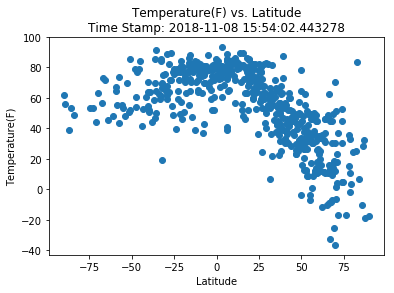

In [11]:
############## Temperature vs Latitude #######################
y = Complete_WeatherDF.Temp
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f"Temperature(F) vs. Latitude\nTime Stamp: {ts}")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.savefig('WeatherPy_Temp.vs.Lat.png')
plt.show()

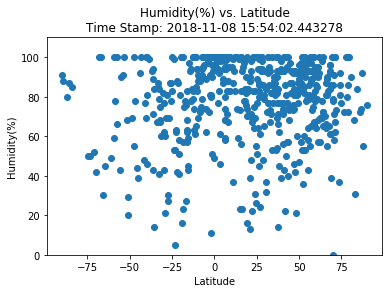

In [12]:
############## Humidity vs Latitude #######################
y = Complete_WeatherDF.Humidity
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'Humidity(%) vs. Latitude\nTime Stamp: {ts}')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
### Note for ylim - I added the ylim because sometimes a city would pull back a humidity percentage that was greater than
### 100% and it would distort the visualization...
plt.ylim(0,110)
plt.savefig('WeatherPy_Humidity.vs.Lat.png')
plt.show()

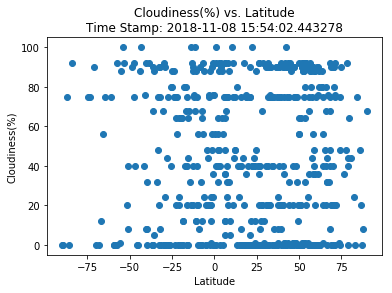

In [13]:
############## Cloudiness vs Latitude #######################
y = Complete_WeatherDF.Cloudiness
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'Cloudiness(%) vs. Latitude\nTime Stamp: {ts}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('WeatherPy_Cloudiness.vs.Lat.png')
plt.show()

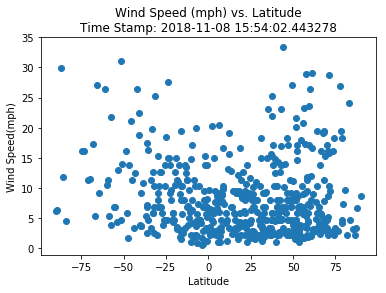

In [14]:
############## WindSpeed vs Latitude #######################
y = Complete_WeatherDF['Wind Speed']
x = Complete_WeatherDF.Lat
plt.scatter(x,y,marker = 'o')
plt.title(f'Wind Speed (mph) vs. Latitude\nTime Stamp: {ts}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig('WeatherPy_WindSpeed.vs.Lat.png')
plt.show()

In [20]:
WeatherDF_HTML = Complete_WeatherDF.to_html()


In [21]:
clean_weatherdfHTML = WeatherDF_HTML.replace('\n', '')
clean_weatherdfHTML

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>City</th>      <th>Lat</th>      <th>Lng</th>      <th>Temp</th>      <th>Humidity</th>      <th>Cloudiness</th>      <th>Wind Speed</th>      <th>City ID</th>    </tr>  </thead>  <tbody>    <tr>      <th>2</th>      <td>anadyr</td>      <td>60.950009</td>      <td>174.863031</td>      <td>33.80</td>      <td>95</td>      <td>90</td>      <td>29.08</td>      <td>2127202</td>    </tr>    <tr>      <th>3</th>      <td>mahebourg</td>      <td>-46.730664</td>      <td>80.780934</td>      <td>77.00</td>      <td>78</td>      <td>40</td>      <td>13.87</td>      <td>934322</td>    </tr>    <tr>      <th>4</th>      <td>cape town</td>      <td>-59.073003</td>      <td>-8.722237</td>      <td>64.40</td>      <td>59</td>      <td>0</td>      <td>11.41</td>      <td>3369157</td>    </tr>    <tr>      <th>5</th>      <td>arraial do cabo</td>      <td>-53.085996</td>      <td>-17.658755</td>  

In [22]:
Complete_WeatherDF.to_html('table.html')

In [23]:
Complete_WeatherDF.head().to_html('tableHEAD.html')